In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas
import seaborn as sns
import math
import scipy.stats
from scipy.special import btdtr
from sklearn.impute import KNNImputer
from sklearn import preprocessing 

### Считывание даных под вариант

In [2]:
df: pandas.DataFrame = pandas.read_csv('variant_15.csv')

In [3]:
df

,couple_1_1,couple_1_2,couple_2_1,couple_2_2,couple_3_1,couple_3_2,couple_4_1,couple_4_2,couple_5_1,couple_5_2,couple_6_1,couple_6_2
0,110.495097,451.264028,-707.844575,-705.526271,-2347.044517,2557.286179,1954.137311,385.327709,568.238212,445.613858,654.880066,1441.437659
1,263.736050,-152.413944,-681.818447,-690.062583,745.908049,1645.364124,1005.663999,-32.175026,-311.427553,669.932287,-53.284810,1435.753986
2,-115.888140,288.362124,-721.884256,-681.080757,97.161867,-234.645607,619.026789,504.388469,371.909747,356.920852,815.029690,-428.798112
3,-178.113545,-121.627907,-706.937029,-722.329515,-1212.943142,2818.646271,1796.133580,1638.601435,427.819672,415.589374,744.156538,1470.352478
4,160.147630,91.598615,-704.343325,-684.224269,1186.526392,118.014149,1404.604911,1287.382396,696.094165,491.898101,995.017338,168.042913
5,-72.537205,-179.698503,-704.468169,-736.746852,836.000451,2910.274507,64.009172,1066.372057,-168.680988,587.994880,497.642438,275.670512
6,202.629010,352.578919,-708.736821,-725.037670,-458.878545,551.926902,1562.074172,1216.255027,-404.479359,341.847326,713.277882,-283.098770
7,-40.554371,-53.903743,-726.823268,-726.799691,-1284.932692,2267.771797,-274.265000,-346.232962,-21.719541,474.310000,1180.034143,-500.765610
8,-286.640647,23.358331,-728.769587,-740.374001,-801.979167,1249.440731,1704.651055,8.481212,584.827753,543.713208,1296.124923,792.506981
9,479.120241,97.867843,-691.035630,-748.585825,420.578221,1579.954025,682.273510,2182.592576,64.184902,524.707354,787.678783,304.676355


Уровень значимости

In [4]:
alpha = 0.05

### Вспомогательные функции

Функция строит гистограммы двух выборок

In [5]:
def illustrate_plots(*args, bins_number=40):
    f, axes = plt.subplots(1, len(args), figsize=(16, 6))
    for i, info in enumerate(args):
        sns.histplot(data=info, bins=bins_number, kde=True, ax=axes[i], color='salmon')

Проверяет распределение на нормальность

In [6]:
def normality_check(*args):
    is_normal = True
    for data in args:
        if scipy.stats.shapiro(data).pvalue >= alpha:
            print(f'Распределение {data.name} нормальное.')
        else:
            print(f'Распределение {data.name} не нормальное.')
            is_normal = False
    return is_normal

Проверяет гипотезу о равенстве двух дисперсий

### Функции первого задания

In [8]:
def two_variance_check(data1: pandas.Series, data2: pandas.Series, normal=True):
    print(f'Первая дисперсия: {round(np.var(data1))}; вторая дисперсия: {round(np.var(data2))}')
    
    if normal:  # Если распределение нормальное, используем критерий Барлетта
        print('Используется критерий Барлетта')
        result = scipy.stats.bartlett(data1, data2)
    else:  # Если распределение ненормальное, используем критерий Флигнера-Килина
        print('Используется критерий Флигнера-Килина')
        result = scipy.stats.fligner(data1, data2) 
        
    print(f'P-значение: {result[1]}')
    return result[1] >= alpha

Проверяет гипотезу о равенстве двух математических ожиданий

In [10]:
def two_mean_check(data1: pandas.Series, data2: pandas.Series, normal=True, equal_var=True):
    print(f'Первое мат. ожидание: {round(np.mean(data1))}; второе мат. ожидание: {round(np.mean(data2))}')
    
    if normal and equal_var:  # Если распределение нормальное, и дисперсии равны, используется критерий Стьюдента
        print('Используется критерий Стьюдента')
        result = scipy.stats.ttest_ind(data1, data2, equal_var=True)
    elif normal and not equal_var:  # Если распределение нормальное, но дисперсии не равны, используется критерий Уэлча
        print('Используется критерий Уэлча')
        result = scipy.stats.ttest_ind(data1, data2, equal_var=False)
    else:
        print('Используется критерий Манна-Уитни')
        result = scipy.stats.mannwhitneyu(data1, data2)  # В ином случае используем критерий Манна-Уитни
    
    print(f'P-значение: {result[1]}')
    return result[1] >= alpha

Применяет гипотезы о равенстве двух мат. ожиданий и дисперсий к двум выборкам и выводит результат на экран

In [11]:
def two_selection_check(data1: pandas.Series, data2: pandas.Series):
    illustrate_plots(df['couple_1_1'], df['couple_1_2'])
    
    is_normal = normality_check(df['couple_1_1'], df['couple_1_2'])
    
    print('')
    equal_var = two_variance_check(data1, data2, normal=is_normal)
    print('Дисперсии равны\n') if equal_var else print('Дисперсии не равны\n')
    
    equal_mean = two_mean_check(data1, data2, normal=is_normal, equal_var=equal_var)
    print('Мат. ожидания равны') if equal_mean else print('Мат. ожидания не равны')

### Функции второго задания

In [12]:
def several_variance_check(*args, normal=True):
    print(f'Список дисперсий: {[np.var(data) for data in args]}')
    
    if normal:  # Если распределение нормальное, используем критерий Барлетта
        print('Используется критерий Барлетта')
        result = scipy.stats.bartlett(*args)
    else:  # Если распределение ненормальное, используем критерий Левене
        print('Используется критерий Левене')
        result = scipy.stats.levene(*args) 
        
    print(f'P-значение: {result[1]}')
    return result[1] >= alpha

Применяет гипотезу о равенстве дисперсий к нескольким выборкам

In [181]:
def several_selection_check(*args):    
    is_normal = normality_check(*args)
    
    print('')
    equal_var = several_variance_check(*args, normal=is_normal)
    print('Дисперсии равны\n') if equal_var else print('Дисперсии не равны\n')

### Основная часть

#### Две выборки

Распределение couple_1_1 нормальное.
Распределение couple_1_2 нормальное.

Первая дисперсия: 101295; вторая дисперсия: 82911
Используется критерий Барлетта
P-значение: 0.4859200307601901
Дисперсии равны

Первое мат. ожидание: 4; второе мат. ожидание: 175
Используется критерий Стьюдента
P-значение: 0.006381411041782895
Мат. ожидания не равны


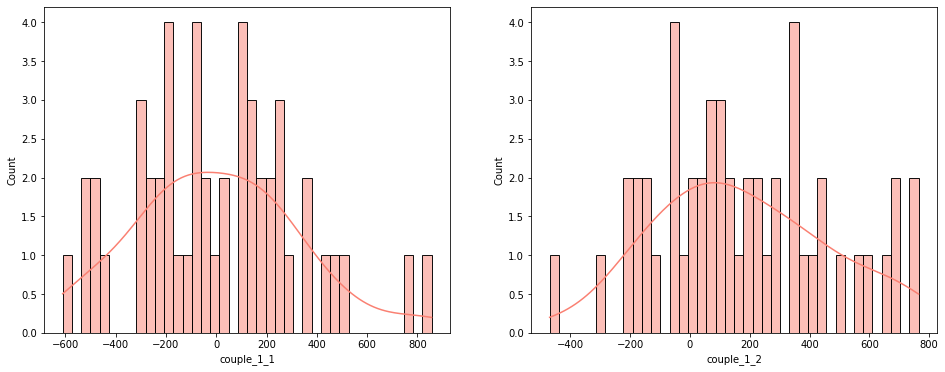

In [182]:
two_selection_check(df['couple_1_1'], df['couple_1_2'])

Распределение couple_1_1 нормальное.
Распределение couple_1_2 нормальное.

Первая дисперсия: 211; вторая дисперсия: 371
Используется критерий Барлетта
P-значение: 0.05146577654279684
Дисперсии равны

Первое мат. ожидание: -707; второе мат. ожидание: -708
Используется критерий Стьюдента
P-значение: 0.6962250301168176
Мат. ожидания равны


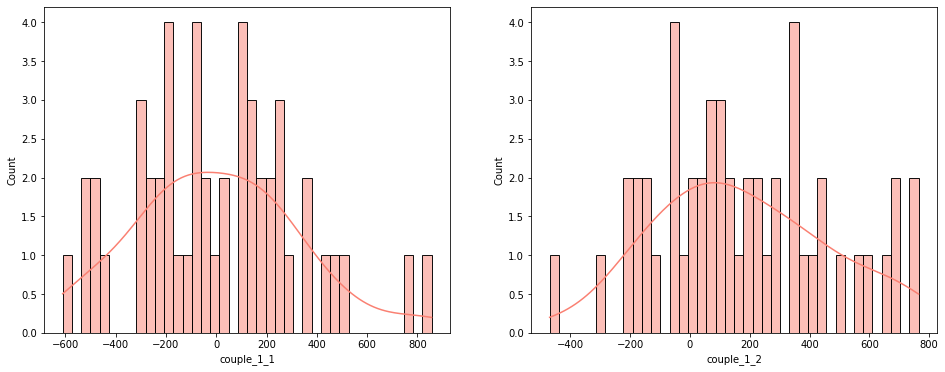

In [183]:
two_selection_check(df['couple_2_1'], df['couple_2_2'])

Распределение couple_1_1 нормальное.
Распределение couple_1_2 нормальное.

Первая дисперсия: 953254; вторая дисперсия: 821317
Используется критерий Барлетта
P-значение: 0.6040933496657563
Дисперсии равны

Первое мат. ожидание: 33; второе мат. ожидание: 1562
Используется критерий Стьюдента
P-значение: 2.1051134773390992e-12
Мат. ожидания не равны


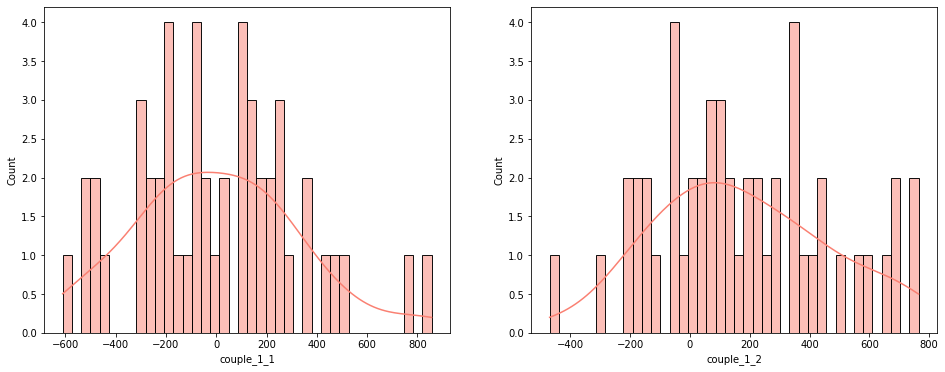

In [184]:
two_selection_check(df['couple_3_1'], df['couple_3_2'])

Распределение couple_1_1 нормальное.
Распределение couple_1_2 нормальное.

Первая дисперсия: 719818; вторая дисперсия: 653515
Используется критерий Барлетта
P-значение: 0.7365427468971373
Дисперсии равны

Первое мат. ожидание: 986; второе мат. ожидание: 745
Используется критерий Стьюдента
P-значение: 0.1520955359535305
Мат. ожидания равны


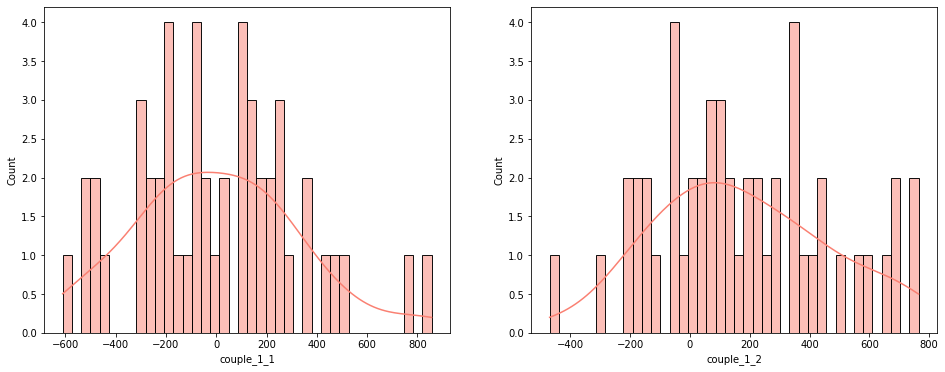

In [185]:
two_selection_check(df['couple_4_1'], df['couple_4_2'])

Распределение couple_1_1 нормальное.
Распределение couple_1_2 нормальное.

Первая дисперсия: 110442; вторая дисперсия: 12319
Используется критерий Барлетта
P-значение: 2.083522604123588e-12
Дисперсии не равны

Первое мат. ожидание: 248; второе мат. ожидание: 511
Используется критерий Уэлча
P-значение: 2.144802664213762e-06
Мат. ожидания не равны


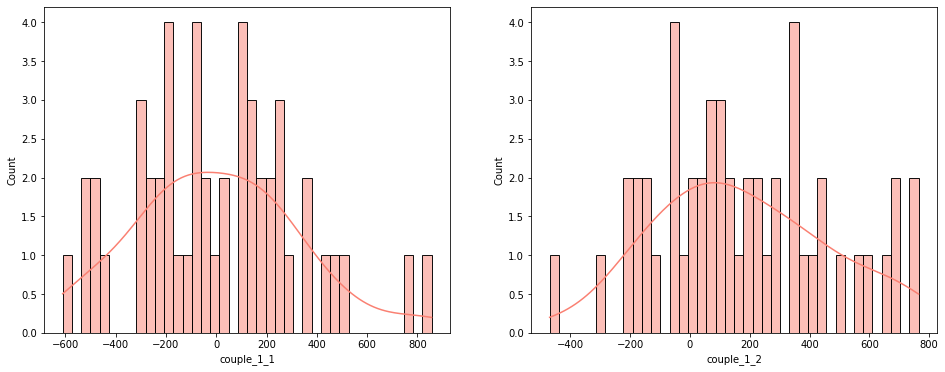

In [186]:
two_selection_check(df['couple_5_1'], df['couple_5_2'])

Распределение couple_1_1 нормальное.
Распределение couple_1_2 нормальное.

Первая дисперсия: 658533; вторая дисперсия: 1264487
Используется критерий Барлетта
P-значение: 0.02431058392946287
Дисперсии не равны

Первое мат. ожидание: 722; второе мат. ожидание: 935
Используется критерий Уэлча
P-значение: 0.28572224079629693
Мат. ожидания равны


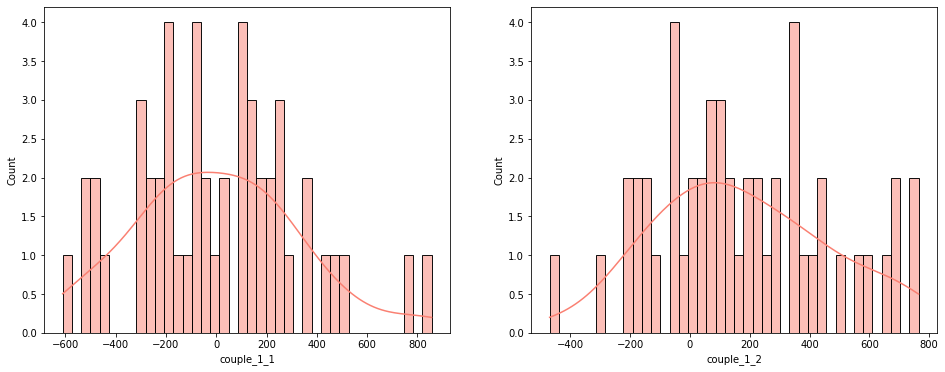

In [187]:
two_selection_check(df['couple_6_1'], df['couple_6_2'])

#### Несколько выборок

In [188]:
several_selection_check(*[df[column] for column in df])

Распределение couple_1_1 нормальное.
Распределение couple_1_2 нормальное.
Распределение couple_2_1 нормальное.
Распределение couple_2_2 нормальное.
Распределение couple_3_1 нормальное.
Распределение couple_3_2 не нормальное.
Распределение couple_4_1 нормальное.
Распределение couple_4_2 не нормальное.
Распределение couple_5_1 нормальное.
Распределение couple_5_2 нормальное.
Распределение couple_6_1 нормальное.
Распределение couple_6_2 нормальное.

Список дисперсий: [101295.05704945182, 82911.032028269, 211.08158224023825, 370.6203830167054, 953253.5931385471, 821316.6921683684, 719817.8450434343, 653515.2601621299, 110441.53683067748, 12319.320893347314, 658533.293942717, 1264487.0499898954]
Используется критерий Левене
P-значение: 3.4574724702343863e-50
Дисперсии не равны



### Дополнительное задание (критерий Уэлча)

In [189]:
def dop(data1, data2):
    s1 = np.var(data1, ddof=1)
    s2 = np.var(data2, ddof=1)
    n1 = len(data1)
    n2 = len(data2)
    
    t = (np.mean(data1) - np.mean(data2)) / np.sqrt(s1 / n1 + s2 / n2)
    
    df = (s1 / n1 + s2 / n2)**2 / (s1**2 / (n1**2 * (n1 - 1)) + (s2**2 / (n2**2 * (n2 - 1))))
    p_value = btdtr(df/2, 1/2, df / (t**2 + df))
    return t, p_value

In [190]:
dop(df['couple_6_1'], df['couple_6_2'])

(-1.0739974708887527, 0.28572224079629605)

In [191]:
scipy.stats.ttest_ind(df['couple_6_1'], df['couple_6_2'], equal_var=False)

Ttest_indResult(statistic=-1.0739974708887527, pvalue=0.28572224079629693)